In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
import json

In [3]:
url = 'https://www.fotmob.com/matches/marseille-vs-brighton/2x6hvy#4315104'
page = requests.get(url)

In [4]:
page

<Response [200]>

In [5]:
soup = BeautifulSoup(page.text,'html.parser')

In [6]:
scripts = soup.find_all('script')

In [7]:
scripts

[<script type="application/ld+json">{"@context":"https://schema.org","@type":"FAQPage","mainEntity":[{"@type":"Question","name":"Who won between Brighton & Hove Albion and Marseille on Thu, 14 Dec 2023 20:00:00 GMT?","acceptedAnswer":{"@type":"Answer","text":"Brighton & Hove Albion won 1–0 over Marseille on Thu, 14 Dec 2023 20:00:00 GMT."}}]}</script>,
 <script type="application/ld+json">{"@context":"https://schema.org","@type":"SportsEvent","sport":"Football/Soccer","homeTeam":{"@context":"https://schema.org","@type":"SportsTeam","name":"Brighton & Hove Albion","sport":"Football/Soccer","logo":"https://images.fotmob.com/image_resources/logo/teamlogo/10204.png","url":"https://www.fotmob.com/teams/10204/overview/brighton-hove-albion","location":null,"memberOf":null},"awayTeam":{"@context":"https://schema.org","@type":"SportsTeam","name":"Marseille","sport":"Football/Soccer","logo":"https://images.fotmob.com/image_resources/logo/teamlogo/8592.png","url":"https://www.fotmob.com/teams/8592

In [8]:
#this is the the specific string from the "scripts" HMTL that contains the JSON data
#scripts[103]

In [9]:
strings = scripts[103].string
#strings

In [10]:
#splitting to only select the relevant match data ("strings" includes more stuff we don't want...)
before, sep, after = strings.partition(',"seo"')

In [11]:
#before

In [12]:
def check_json_brackets(json_string):
    square_brackets = 0  # For []
    curly_brackets = 0   # For {}

    for char in json_string:
        if char == '[':
            square_brackets += 1
        elif char == ']':
            square_brackets -= 1
        elif char == '{':
            curly_brackets += 1
        elif char == '}':
            curly_brackets -= 1

    return square_brackets, curly_brackets

# Replace with your actual JSON string
json_string = before
square, curly = check_json_brackets(json_string)

print("Mismatch in square brackets: ", square)
print("Mismatch in curly brackets: ", curly)

Mismatch in square brackets:  0
Mismatch in curly brackets:  3


In [13]:
#correcting the JSON string in order to be able to parse it
before = before.replace(r'{"props":{"pageProps":','')
before = before + '}'

In [14]:
data = json.loads(before)

In [15]:
df = pd.json_normalize(data)

In [16]:
df

,nav,ongoing,hasPendingVAR,general.matchId,general.matchName,general.matchRound,general.teamColors.darkMode.home,general.teamColors.darkMode.away,general.teamColors.lightMode.home,general.teamColors.lightMode.away,...,content.table.url,content.table.teams,content.table.tournamentNameForUrl,content.table.parentLeagueId,content.table.countryCode,content.h2h.summary,content.h2h.matches,content.momentum.main.data,content.momentum.main.debugTitle,content.momentum.alternateModels
0,"[matchfacts, liveticker, lineup, stats, table,...",False,False,4315104,"Brighton & Hove Albion-vs-Marseille_Thu, Dec 1...",6,#095bb6,#ffffff,#0850A0,#242736,...,https://data.fotmob.com/tables.ext.887389.fot.gz,"[10204, 8592]",Europa League Grp. B,73,INT-2,"[0, 1, 0]",[{'time': {'utcTime': '2023-10-05T16:45:00.000...,"[{'minute': 0, 'value': 0}, {'minute': 1, 'val...",Using xT SA-version,[]


In [17]:
data.keys()

dict_keys(['general', 'header', 'nav', 'ongoing', 'hasPendingVAR', 'content'])

In [18]:
data.values()

dict_values([{'matchId': '4315104', 'matchName': 'Brighton & Hove Albion-vs-Marseille_Thu, Dec 14, 2023, 20:00 UTC', 'matchRound': '6', 'teamColors': {'darkMode': {'home': '#095bb6', 'away': '#ffffff'}, 'lightMode': {'home': '#0850A0', 'away': '#242736'}, 'fontDarkMode': {'home': 'rgba(255, 255, 255, 1.0)', 'away': 'rgba(29, 29, 29, 1.0)'}, 'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)', 'away': 'rgba(255, 255, 255, 1.0)'}}, 'leagueId': 887389, 'leagueName': 'Europa League Grp. B', 'leagueRoundName': 'Round 6', 'parentLeagueId': 73, 'countryCode': 'INT-2', 'homeTeam': {'name': 'Brighton & Hove Albion', 'id': 10204}, 'awayTeam': {'name': 'Marseille', 'id': 8592}, 'coverageLevel': 'xG', 'matchTimeUTC': 'Thu, Dec 14, 2023, 20:00 UTC', 'matchTimeUTCDate': '2023-12-14T20:00:00.000Z', 'started': True, 'finished': True}, {'teams': [{'name': 'Brighton & Hove Albion', 'id': 10204, 'score': 1, 'imageUrl': 'https://images.fotmob.com/image_resources/logo/teamlogo/10204_small.png', 'pageUrl':

In [19]:
data

{'general': {'matchId': '4315104',
  'matchName': 'Brighton & Hove Albion-vs-Marseille_Thu, Dec 14, 2023, 20:00 UTC',
  'matchRound': '6',
  'teamColors': {'darkMode': {'home': '#095bb6', 'away': '#ffffff'},
   'lightMode': {'home': '#0850A0', 'away': '#242736'},
   'fontDarkMode': {'home': 'rgba(255, 255, 255, 1.0)',
    'away': 'rgba(29, 29, 29, 1.0)'},
   'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)',
    'away': 'rgba(255, 255, 255, 1.0)'}},
  'leagueId': 887389,
  'leagueName': 'Europa League Grp. B',
  'leagueRoundName': 'Round 6',
  'parentLeagueId': 73,
  'countryCode': 'INT-2',
  'homeTeam': {'name': 'Brighton & Hove Albion', 'id': 10204},
  'awayTeam': {'name': 'Marseille', 'id': 8592},
  'coverageLevel': 'xG',
  'matchTimeUTC': 'Thu, Dec 14, 2023, 20:00 UTC',
  'matchTimeUTCDate': '2023-12-14T20:00:00.000Z',
  'started': True,
  'finished': True},
 'header': {'teams': [{'name': 'Brighton & Hove Albion',
    'id': 10204,
    'score': 1,
    'imageUrl': 'https://images.

**Lineups**

In [20]:
data['content']['lineup']

{'lineup': [{'teamId': 10204,
   'teamName': 'Brighton & Hove Albion',
   'bench': [{'id': '1068482',
     'positionId': 0,
     'position': 'Substitute',
     'localizedPosition': None,
     'name': {'firstName': 'Evan',
      'lastName': 'Ferguson',
      'fullName': 'Evan Ferguson'},
     'shirt': 28,
     'usualPosition': 3,
     'usingOptaId': False,
     'teamId': '10204',
     'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/1068482.png',
     'pageUrl': '/players/1068482/evan-ferguson',
     'isHomeTeam': True,
     'timeSubbedOn': 64,
     'timeSubbedOff': None,
     'positionRow': 0,
     'role': 'Attacker',
     'events': {'sub': {'subbedIn': 64}},
     'rating': {'num': '6.1',
      'bgcolor': '#f08022',
      'isTop': {'isTopRating': False, 'isMatchFinished': True}},
     'fantasyScore': {'num': None, 'bgcolor': 'purple'},
     'minutesPlayed': 26,
     'shotmap': [{'id': 2628817501,
       'eventType': 'Miss',
       'teamId': 10204,
       'playerId': 

In [21]:
data['content']['lineup']['lineup'][0]

{'teamId': 10204,
 'teamName': 'Brighton & Hove Albion',
 'bench': [{'id': '1068482',
   'positionId': 0,
   'position': 'Substitute',
   'localizedPosition': None,
   'name': {'firstName': 'Evan',
    'lastName': 'Ferguson',
    'fullName': 'Evan Ferguson'},
   'shirt': 28,
   'usualPosition': 3,
   'usingOptaId': False,
   'teamId': '10204',
   'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/1068482.png',
   'pageUrl': '/players/1068482/evan-ferguson',
   'isHomeTeam': True,
   'timeSubbedOn': 64,
   'timeSubbedOff': None,
   'positionRow': 0,
   'role': 'Attacker',
   'events': {'sub': {'subbedIn': 64}},
   'rating': {'num': '6.1',
    'bgcolor': '#f08022',
    'isTop': {'isTopRating': False, 'isMatchFinished': True}},
   'fantasyScore': {'num': None, 'bgcolor': 'purple'},
   'minutesPlayed': 26,
   'shotmap': [{'id': 2628817501,
     'eventType': 'Miss',
     'teamId': 10204,
     'playerId': 1068482,
     'playerName': 'Evan Ferguson',
     'x': 86.5676470584,


In [22]:
data['content']['lineup']['lineup'][1]

{'teamId': 8592,
 'teamName': 'Marseille',
 'bench': [{'id': '965764',
   'positionId': 0,
   'position': 'Substitute',
   'localizedPosition': None,
   'name': {'firstName': 'Iliman',
    'lastName': 'Ndiaye',
    'fullName': 'Iliman Ndiaye'},
   'shirt': 29,
   'usualPosition': 3,
   'usingOptaId': False,
   'teamId': '8592',
   'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/965764.png',
   'pageUrl': '/players/965764/iliman-ndiaye',
   'isHomeTeam': False,
   'timeSubbedOn': 52,
   'timeSubbedOff': None,
   'positionRow': 0,
   'role': 'Attacker',
   'events': {'sub': {'subbedIn': 52}},
   'rating': {'num': '6.6',
    'bgcolor': '#f08022',
    'isTop': {'isTopRating': False, 'isMatchFinished': True}},
   'fantasyScore': {'num': None, 'bgcolor': 'purple'},
   'minutesPlayed': 38,
   'shotmap': [],
   'stats': [{'title': 'Top stats',
     'key': 'top_stats',
     'stats': {'FotMob rating': {'key': 'rating_title', 'value': 6.55},
      'Minutes played': {'key': 'mi

In [23]:
data['content']['lineup']['lineup'][0]['players']

[[{'id': '107917',
   'positionId': 11,
   'position': 'Keeper',
   'positionStringShort': 'GK',
   'localizedPosition': {'label': 'GK', 'key': 'keeper'},
   'name': {'firstName': 'Jason',
    'lastName': 'Steele',
    'fullName': 'Jason Steele'},
   'shirt': 23,
   'usualPosition': 0,
   'usingOptaId': False,
   'teamId': '10204',
   'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/107917.png',
   'pageUrl': '/players/107917/jason-steele',
   'isHomeTeam': True,
   'timeSubbedOn': None,
   'timeSubbedOff': None,
   'positionRow': 0,
   'role': 'Keeper',
   'events': {'yc': 1},
   'rating': {'num': '7.1',
    'bgcolor': '#1ec853',
    'isTop': {'isTopRating': False, 'isMatchFinished': True}},
   'fantasyScore': {'num': None, 'bgcolor': 'purple'},
   'minutesPlayed': 90,
   'shotmap': [],
   'stats': [{'title': 'Top stats',
     'key': 'top_stats',
     'stats': {'FotMob rating': {'key': 'rating_title', 'value': 7.09},
      'Minutes played': {'key': 'minutes_played',

In [24]:
data['content']['lineup']['lineup'][0]['lineup']

'4 - 2 - 3 - 1'

In [25]:
data['content']['lineup']['lineup'][0]['optaLineup']['bench']

[{'id': '1068482',
  'positionId': 0,
  'position': 'Substitute',
  'localizedPosition': None,
  'name': {'firstName': 'Evan',
   'lastName': 'Ferguson',
   'fullName': 'Evan Ferguson'},
  'shirt': 28,
  'usualPosition': 3,
  'usingOptaId': False,
  'teamId': '10204',
  'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/1068482.png',
  'pageUrl': '/players/1068482/evan-ferguson',
  'isHomeTeam': False,
  'timeSubbedOn': 64,
  'timeSubbedOff': None,
  'positionRow': 0,
  'role': 'Attacker',
  'events': {'sub': {'subbedIn': 64}},
  'rating': {'num': '6.1',
   'bgcolor': '#f08022',
   'isTop': {'isTopRating': False, 'isMatchFinished': True}},
  'fantasyScore': {'num': None, 'bgcolor': 'purple'},
  'minutesPlayed': 26,
  'shotmap': [{'id': 2628817501,
    'eventType': 'Miss',
    'teamId': 10204,
    'playerId': 1068482,
    'playerName': 'Evan Ferguson',
    'x': 86.5676470584,
    'y': 24.5597452279,
    'min': 86,
    'minAdded': None,
    'isBlocked': False,
    'isOnT

In [26]:
data['content']['lineup']['lineup'][0]['optaLineup']['coach']

[{'id': '42044',
  'name': {'firstName': 'Roberto',
   'lastName': 'De Zerbi',
   'fullName': 'Roberto De Zerbi'},
  'usualPosition': 5,
  'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/42044.png',
  'pageUrl': '/players/42044/roberto-de-zerbi',
  'isHomeTeam': False,
  'timeSubbedOn': None,
  'timeSubbedOff': None,
  'positionRow': None,
  'role': 'Coach',
  'isCaptain': False,
  'events': {}}]

In [27]:
data['content']['lineup']['lineup'][0]['optaLineup']['players']

[[{'id': '107917',
   'positionId': 11,
   'position': 'Keeper',
   'positionStringShort': 'GK',
   'localizedPosition': {'label': 'GK', 'key': 'keeper'},
   'name': {'firstName': 'Jason',
    'lastName': 'Steele',
    'fullName': 'Jason Steele'},
   'shirt': 23,
   'usualPosition': 0,
   'usingOptaId': False,
   'teamId': '10204',
   'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/107917.png',
   'pageUrl': '/players/107917/jason-steele',
   'isHomeTeam': False,
   'timeSubbedOn': None,
   'timeSubbedOff': None,
   'positionRow': 0,
   'role': 'Keeper',
   'events': {'yc': 1},
   'rating': {'num': '7.1',
    'bgcolor': '#1ec853',
    'isTop': {'isTopRating': False, 'isMatchFinished': True}},
   'fantasyScore': {'num': None, 'bgcolor': 'purple'},
   'minutesPlayed': 90,
   'shotmap': [],
   'stats': [{'title': 'Top stats',
     'key': 'top_stats',
     'stats': {'FotMob rating': {'key': 'rating_title', 'value': 7.09},
      'Minutes played': {'key': 'minutes_played'

**Player profiles**

In [28]:
data['content']['lineup']['lineup'][0]['optaLineup']['players'][0]

[{'id': '107917',
  'positionId': 11,
  'position': 'Keeper',
  'positionStringShort': 'GK',
  'localizedPosition': {'label': 'GK', 'key': 'keeper'},
  'name': {'firstName': 'Jason',
   'lastName': 'Steele',
   'fullName': 'Jason Steele'},
  'shirt': 23,
  'usualPosition': 0,
  'usingOptaId': False,
  'teamId': '10204',
  'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/107917.png',
  'pageUrl': '/players/107917/jason-steele',
  'isHomeTeam': False,
  'timeSubbedOn': None,
  'timeSubbedOff': None,
  'positionRow': 0,
  'role': 'Keeper',
  'events': {'yc': 1},
  'rating': {'num': '7.1',
   'bgcolor': '#1ec853',
   'isTop': {'isTopRating': False, 'isMatchFinished': True}},
  'fantasyScore': {'num': None, 'bgcolor': 'purple'},
  'minutesPlayed': 90,
  'shotmap': [],
  'stats': [{'title': 'Top stats',
    'key': 'top_stats',
    'stats': {'FotMob rating': {'key': 'rating_title', 'value': 7.09},
     'Minutes played': {'key': 'minutes_played', 'value': 90},
     'Saves': 

In [29]:
data['content']['lineup']['lineup'][0]['optaLineup']['players'][1][3]

{'id': '768331',
 'positionId': 38,
 'position': 'Defender',
 'positionStringShort': 'LB',
 'localizedPosition': {'label': 'LB', 'key': 'leftback_short'},
 'name': {'firstName': '', 'lastName': 'Igor', 'fullName': 'Igor'},
 'shirt': 3,
 'usualPosition': 1,
 'usingOptaId': False,
 'teamId': '10204',
 'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/768331.png',
 'pageUrl': '/players/768331/igor',
 'isHomeTeam': False,
 'timeSubbedOn': None,
 'timeSubbedOff': None,
 'positionRow': 1,
 'role': 'Defender',
 'events': {},
 'rating': {'num': '7.5',
  'bgcolor': '#1ec853',
  'isTop': {'isTopRating': False, 'isMatchFinished': True}},
 'fantasyScore': {'num': None, 'bgcolor': 'purple'},
 'minutesPlayed': 90,
 'shotmap': [],
 'stats': [{'title': 'Top stats',
   'key': 'top_stats',
   'stats': {'FotMob rating': {'key': 'rating_title', 'value': 7.46},
    'Minutes played': {'key': 'minutes_played', 'value': 90},
    'Goals': {'key': 'goals', 'value': 0},
    'Assists': {'key': '

In [30]:
data['content']['lineup']['lineup'][0]['optaLineup']['players'][3][0]['shotmap']

[{'id': 2628760769,
  'eventType': 'AttemptSaved',
  'teamId': 10204,
  'playerId': 1227012,
  'playerName': 'Simon Adingra',
  'x': 85.70882352880001,
  'y': 19.7954140155,
  'min': 7,
  'minAdded': None,
  'isBlocked': False,
  'isOnTarget': True,
  'blockedX': 102.53448275880001,
  'blockedY': 32.3225,
  'goalCrossedY': 33.77125,
  'goalCrossedZ': 0.28252631440000003,
  'expectedGoals': 0.0248645581305027,
  'expectedGoalsOnTarget': 0.0225,
  'shotType': 'LeftFoot',
  'situation': 'RegularPlay',
  'period': 'FirstHalf',
  'isOwnGoal': False,
  'onGoalShot': {'x': 1.0605158730158726,
   'y': 0.07474241121693122,
   'zoomRatio': 1},
  'isSavedOffLine': False,
  'teamColor': '#0850A0'},
 {'id': 2628771325,
  'eventType': 'AttemptSaved',
  'teamId': 10204,
  'playerId': 1227012,
  'playerName': 'Simon Adingra',
  'x': 90.8,
  'y': 20.9864968186,
  'min': 23,
  'minAdded': None,
  'isBlocked': True,
  'isOnTarget': True,
  'blockedX': 93.1,
  'blockedY': 22.177579621699998,
  'goalCrosse

In [31]:
data['content']['lineup']['lineup'][0]['optaLineup']['players'][3][0]['stats']

[{'title': 'Top stats',
  'key': 'top_stats',
  'stats': {'FotMob rating': {'key': 'rating_title', 'value': 7.47},
   'Minutes played': {'key': 'minutes_played', 'value': 64},
   'Goals': {'key': 'goals', 'value': 0},
   'Assists': {'key': 'assists', 'value': 0},
   'Total shots': {'key': 'total_shots', 'value': 4},
   'Shotmap': {'key': None, 'value': True},
   'Accurate passes': {'key': 'accurate_passes', 'value': '18/23 (78%)'},
   'Chances created': {'key': 'chances_created', 'value': 2},
   'Expected goals (xG)': {'key': 'expected_goals', 'value': '0.21'},
   'Expected goals on target (xGOT)': {'key': 'expected_goals_on_target_variant',
    'value': '0.02'},
   'Expected assists (xA)': {'key': 'expected_assists', 'value': '0.17'},
   'xG + xA': {'key': 'xg_and_xa', 'value': '0.38'}}},
 {'title': 'Attack',
  'key': 'attack',
  'stats': {'Shot accuracy': {'key': 'shot_accuracy', 'value': '1/3 (33%)'},
   'Blocked shots': {'key': 'blocked_shots', 'value': 1},
   'Touches': {'key': 't

In [32]:
adingra_top_stats = data['content']['lineup']['lineup'][0]['optaLineup']['players'][3][0]['stats'][0]
adingra_top_df = pd.json_normalize(adingra_top_stats)
adingra_top_df

,title,key,stats.FotMob rating.key,stats.FotMob rating.value,stats.Minutes played.key,stats.Minutes played.value,stats.Goals.key,stats.Goals.value,stats.Assists.key,stats.Assists.value,...,stats.Chances created.key,stats.Chances created.value,stats.Expected goals (xG).key,stats.Expected goals (xG).value,stats.Expected goals on target (xGOT).key,stats.Expected goals on target (xGOT).value,stats.Expected assists (xA).key,stats.Expected assists (xA).value,stats.xG + xA.key,stats.xG + xA.value
0,Top stats,top_stats,rating_title,7.47,minutes_played,64,goals,0,assists,0,...,chances_created,2,expected_goals,0.21,expected_goals_on_target_variant,0.02,expected_assists,0.17,xg_and_xa,0.38


In [33]:
adingra_attack_stats = data['content']['lineup']['lineup'][0]['optaLineup']['players'][3][0]['stats'][1]
adingra_attack = pd.json_normalize(adingra_attack_stats)
adingra_attack

,title,key,stats.Shot accuracy.key,stats.Shot accuracy.value,stats.Blocked shots.key,stats.Blocked shots.value,stats.Touches.key,stats.Touches.value,stats.Touches in opposition box.key,stats.Touches in opposition box.value,...,stats.Passes into final third.key,stats.Passes into final third.value,stats.Accurate crosses.key,stats.Accurate crosses.value,stats.Accurate long balls.key,stats.Accurate long balls.value,stats.Dispossessed.key,stats.Dispossessed.value,stats.xG Non-penalty.key,stats.xG Non-penalty.value
0,Attack,attack,shot_accuracy,1/3 (33%),blocked_shots,1,touches,37,touches_opp_box,7,...,passes_into_final_third,2,accurate_crosses,0/1 (0%),long_balls_accurate,1/2 (50%),dispossessed,0,expected_goals_non_penalty,0.21


In [34]:
adingra_defense_stats = data['content']['lineup']['lineup'][0]['optaLineup']['players'][3][0]['stats'][2]
adingra_defense = pd.json_normalize(adingra_defense_stats)
adingra_defense

,title,key,stats.Tackles won.key,stats.Tackles won.value,stats.Clearances.key,stats.Clearances.value,stats.Headed clearance.key,stats.Headed clearance.value,stats.Defensive actions.key,stats.Defensive actions.value,stats.Recoveries.key,stats.Recoveries.value
0,Defense,defense,tackles_succeeded,1/1 (100%),clearances,1,headed_clearance,1,defensive_actions,4,recoveries,6


In [35]:
adingra_duel_stats = data['content']['lineup']['lineup'][0]['optaLineup']['players'][3][0]['stats'][3]
adingra_duels = pd.json_normalize(adingra_duel_stats)
adingra_duels

,title,key,stats.Duels won.key,stats.Duels won.value,stats.Duels lost.key,stats.Duels lost.value,stats.Ground duels won.key,stats.Ground duels won.value,stats.Aerial duels won.key,stats.Aerial duels won.value,stats.Was fouled.key,stats.Was fouled.value,stats.Fouls committed.key,stats.Fouls committed.value
0,Duels,duels,duel_won,3,duel_lost,2,ground_duels_won,3/5 (60%),aerials_won,0,was_fouled,1,fouls,2


**Compared/Team Stats**

In [36]:
json_stats = data['content']['stats']['Periods']['All']['stats']
json_stats

[{'title': 'Top stats',
  'key': 'top_stats',
  'stats': [{'title': 'Ball possession',
    'key': 'BallPossesion',
    'stats': [61, 39],
    'type': 'graph',
    'highlighted': 'home'},
   {'title': 'Expected goals (xG)',
    'key': 'expected_goals',
    'stats': ['1.16', '0.38'],
    'type': 'text',
    'highlighted': 'home'},
   {'title': 'Total shots',
    'key': 'total_shots',
    'stats': [13, 5],
    'type': 'text',
    'highlighted': 'home'},
   {'title': 'Shots on target',
    'key': 'ShotsOnTarget',
    'stats': [5, 0],
    'type': 'text',
    'highlighted': 'home'},
   {'title': 'Big chances',
    'key': 'big_chance',
    'stats': [0, 0],
    'type': 'text',
    'highlighted': 'equal'},
   {'title': 'Big chances missed',
    'key': 'big_chance_missed_title',
    'stats': [0, 0],
    'type': 'text',
    'highlighted': 'equal'},
   {'title': 'Accurate passes',
    'key': 'accurate_passes',
    'stats': ['547 (89%)', '314 (82%)'],
    'type': 'text',
    'highlighted': 'home'},

In [37]:
game_stats = pd.json_normalize(json_stats)
game_stats

,title,key,stats
0,Top stats,top_stats,"[{'title': 'Ball possession', 'key': 'BallPoss..."
1,Shots,shots,"[{'title': 'Shots', 'key': 'shots', 'stats': [..."
2,Expected goals (xG),expected_goals,"[{'title': 'Expected goals (xG)', 'key': 'expe..."
3,Passes,passes,"[{'title': 'Passes', 'key': 'passes', 'stats':..."
4,Defence,defence,"[{'title': 'Defence', 'key': 'defense', 'stats..."
5,Duels,duels,"[{'title': 'Duels', 'key': 'duels', 'stats': [..."
6,Discipline,discipline,"[{'title': 'Discipline', 'key': 'discipline', ..."


In [38]:
top_stats = data['content']['stats']['Periods']['All']['stats'][0]['stats']
top_stats

[{'title': 'Ball possession',
  'key': 'BallPossesion',
  'stats': [61, 39],
  'type': 'graph',
  'highlighted': 'home'},
 {'title': 'Expected goals (xG)',
  'key': 'expected_goals',
  'stats': ['1.16', '0.38'],
  'type': 'text',
  'highlighted': 'home'},
 {'title': 'Total shots',
  'key': 'total_shots',
  'stats': [13, 5],
  'type': 'text',
  'highlighted': 'home'},
 {'title': 'Shots on target',
  'key': 'ShotsOnTarget',
  'stats': [5, 0],
  'type': 'text',
  'highlighted': 'home'},
 {'title': 'Big chances',
  'key': 'big_chance',
  'stats': [0, 0],
  'type': 'text',
  'highlighted': 'equal'},
 {'title': 'Big chances missed',
  'key': 'big_chance_missed_title',
  'stats': [0, 0],
  'type': 'text',
  'highlighted': 'equal'},
 {'title': 'Accurate passes',
  'key': 'accurate_passes',
  'stats': ['547 (89%)', '314 (82%)'],
  'type': 'text',
  'highlighted': 'home'},
 {'title': 'Fouls committed',
  'key': 'fouls',
  'stats': [15, 14],
  'type': 'text',
  'highlighted': 'away'},
 {'title': 

In [39]:
top_stats = pd.json_normalize(top_stats)
top_stats

,title,key,stats,type,highlighted
0,Ball possession,BallPossesion,"[61, 39]",graph,home
1,Expected goals (xG),expected_goals,"[1.16, 0.38]",text,home
2,Total shots,total_shots,"[13, 5]",text,home
3,Shots on target,ShotsOnTarget,"[5, 0]",text,home
4,Big chances,big_chance,"[0, 0]",text,equal
5,Big chances missed,big_chance_missed_title,"[0, 0]",text,equal
6,Accurate passes,accurate_passes,"[547 (89%), 314 (82%)]",text,home
7,Fouls committed,fouls,"[15, 14]",text,away
8,Corners,corners,"[0, 2]",text,away


In [40]:
shooting_stats = data['content']['stats']['Periods']['All']['stats'][1]['stats']
shooting_stats = pd.json_normalize(shooting_stats)
shooting_stats

,title,key,stats,type,highlighted
0,Shots,shots,"[None, None]",title,equal
1,Total shots,total_shots,"[13, 5]",text,home
2,Shots off target,ShotsOffTarget,"[4, 4]",text,equal
3,Shots on target,ShotsOnTarget,"[5, 0]",text,home
4,Blocked shots,blocked_shots,"[4, 1]",text,home
5,Hit woodwork,shots_woodwork,"[0, 2]",text,away
6,Shots inside box,shots_inside_box,"[7, 2]",text,home
7,Shots outside box,shots_outside_box,"[6, 3]",text,home


In [41]:
xG_stats = data['content']['stats']['Periods']['All']['stats'][2]['stats']
xG_stats = pd.json_normalize(xG_stats)
xG_stats

,title,key,stats,type,highlighted
0,Expected goals (xG),expected_goals,"[None, None]",title,equal
1,Expected goals (xG),expected_goals,"[1.16, 0.38]",text,home
2,xG open play,expected_goals_open_play,"[1.11, 0.37]",text,home
3,xG set play,expected_goals_set_play,"[0.04, 0.01]",text,home
4,xG non-penalty,expected_goals_non_penalty,"[1.16, 0.38]",text,home
5,xG on target (xGOT),expected_goals_on_target,"[0.44, 0.00]",text,home


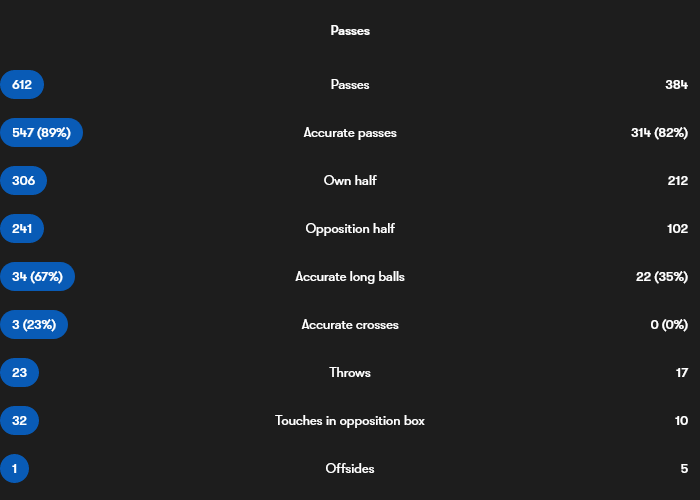

In [42]:
#notice how there's not only passes here but also throws, touches in opp. box and offsides
passing_stats = data['content']['stats']['Periods']['All']['stats'][3]['stats']
passing_stats = pd.json_normalize(passing_stats)
passing_stats

,title,key,stats,type,highlighted
0,Passes,passes,"[None, None]",title,equal
1,Passes,passes,"[612, 384]",text,home
2,Accurate passes,accurate_passes,"[547 (89%), 314 (82%)]",text,home
3,Own half,own_half_passes,"[306, 212]",text,home
4,Opposition half,opposition_half_passes,"[241, 102]",text,home
5,Accurate long balls,long_balls_accurate,"[34 (67%), 22 (35%)]",text,home
6,Accurate crosses,accurate_crosses,"[3 (23%), 0 (0%)]",text,home
7,Throws,player_throws,"[23, 17]",text,home
8,Touches in opposition box,touches_opp_box,"[32, 10]",text,home
9,Offsides,Offsides,"[1, 5]",text,home


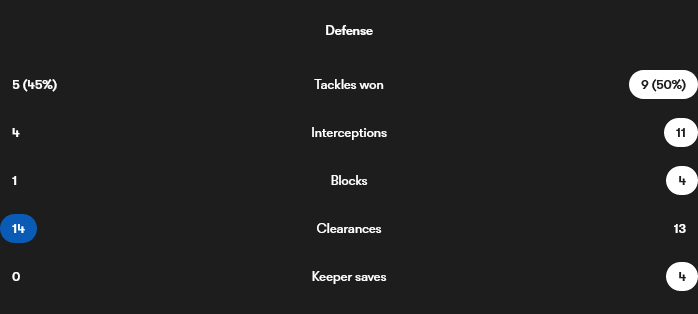

In [43]:
defense_stats = data['content']['stats']['Periods']['All']['stats'][4]['stats']
defense_stats = pd.json_normalize(defense_stats)
defense_stats

,title,key,stats,type,highlighted
0,Defence,defense,"[None, None]",title,equal
1,Tackles won,tackles_succeeded,"[5 (45%), 9 (50%)]",text,away
2,Interceptions,interceptions,"[4, 11]",text,away
3,Blocks,shot_blocks,"[1, 4]",text,away
4,Clearances,clearances,"[14, 13]",text,home
5,Keeper saves,keeper_saves,"[0, 4]",text,away


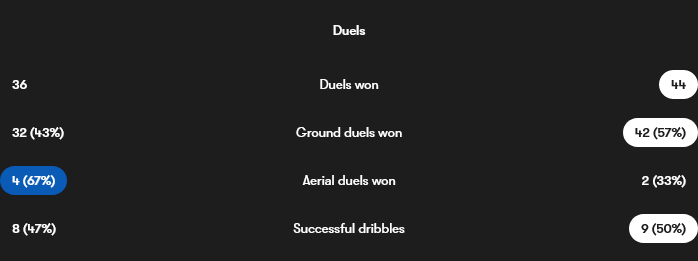

In [44]:
#notice how there's successful dribbles too!
duel_stats = data['content']['stats']['Periods']['All']['stats'][5]['stats']
duel_stats = pd.json_normalize(duel_stats)
duel_stats

,title,key,stats,type,highlighted
0,Duels,duels,"[None, None]",title,equal
1,Duels won,duel_won,"[36, 44]",text,away
2,Ground duels won,ground_duels_won,"[32 (43%), 42 (57%)]",text,away
3,Aerial duels won,aerials_won,"[4 (67%), 2 (33%)]",text,home
4,Successful dribbles,dribbles_succeeded,"[8 (47%), 9 (50%)]",text,away


**Shotmap and Shot/xG Data**
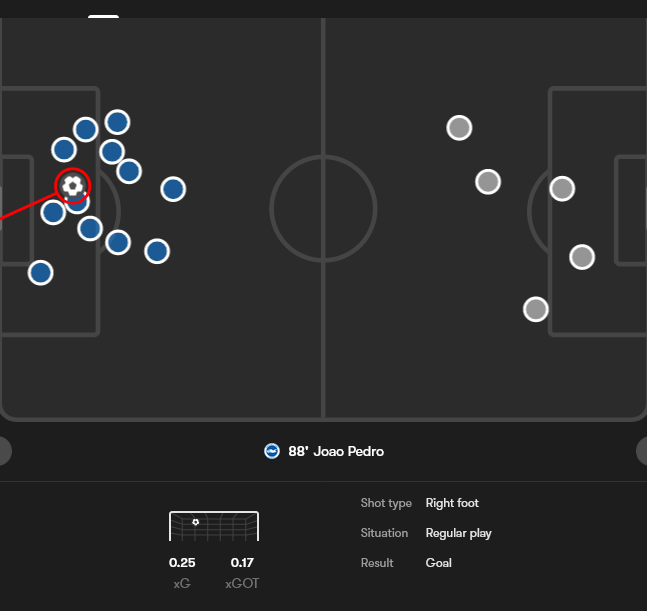

In [45]:
data['content']['shotmap']

{'shots': [{'id': 2628760769,
   'eventType': 'AttemptSaved',
   'teamId': 10204,
   'playerId': 1227012,
   'playerName': 'Simon Adingra',
   'x': 85.70882352880001,
   'y': 19.7954140155,
   'min': 7,
   'minAdded': None,
   'isBlocked': False,
   'isOnTarget': True,
   'blockedX': 102.53448275880001,
   'blockedY': 32.3225,
   'goalCrossedY': 33.77125,
   'goalCrossedZ': 0.28252631440000003,
   'expectedGoals': 0.0248645581305027,
   'expectedGoalsOnTarget': 0.0225,
   'shotType': 'LeftFoot',
   'situation': 'RegularPlay',
   'period': 'FirstHalf',
   'isOwnGoal': False,
   'onGoalShot': {'x': 1.0605158730158726,
    'y': 0.07474241121693122,
    'zoomRatio': 1},
   'isSavedOffLine': False,
   'firstName': 'Simon',
   'lastName': 'Adingra',
   'fullName': 'Simon Adingra',
   'teamColor': '#0850A0'},
  {'id': 2628763671,
   'eventType': 'Miss',
   'teamId': 10204,
   'playerId': 1021382,
   'playerName': 'Joao Pedro',
   'x': 92.2,
   'y': 32.551249999999996,
   'min': 11,
   'minAdd

In [46]:
json_shots = data['content']['shotmap']['shots']

In [47]:
shots_df = pd.json_normalize(json_shots)

In [48]:
shots_df

,id,eventType,teamId,playerId,playerName,x,y,min,minAdded,isBlocked,...,period,isOwnGoal,isSavedOffLine,firstName,lastName,fullName,teamColor,onGoalShot.x,onGoalShot.y,onGoalShot.zoomRatio
0,2628760769,AttemptSaved,10204,1227012,Simon Adingra,85.708824,19.795414,7,None,False,...,FirstHalf,False,False,Simon,Adingra,Simon Adingra,#0850A0,1.060516,0.074742,1.000000
1,2628763671,Miss,10204,1021382,Joao Pedro,92.200000,32.551250,11,None,False,...,FirstHalf,False,False,Joao,Pedro,Joao Pedro,#0850A0,1.647770,0.677249,0.416340
2,2628766625,AttemptSaved,8592,715301,Jonathan Clauss,86.567647,18.113885,15,None,True,...,FirstHalf,False,False,Jonathan,Clauss,Jonathan Clauss,#007EC1,1.544643,0.322751,1.000000
3,2628768007,AttemptSaved,10204,862608,Kaoru Mitoma,79.331553,40.553571,18,None,False,...,FirstHalf,False,False,Kaoru,Mitoma,Kaoru Mitoma,#0850A0,1.020172,0.139293,1.000000
4,2628770157,AttemptSaved,10204,1021382,Joao Pedro,96.026316,34.305000,21,None,True,...,FirstHalf,False,False,Joao,Pedro,Joao Pedro,#0850A0,1.322751,0.322751,1.000000
5,2628771325,AttemptSaved,10204,1227012,Simon Adingra,90.800000,20.986497,23,None,True,...,FirstHalf,False,False,Simon,Adingra,Simon Adingra,#0850A0,0.556217,0.322751,1.000000
6,2628783789,AttemptSaved,10204,1021382,Joao Pedro,90.100000,36.897500,41,None,False,...,FirstHalf,False,False,Joao,Pedro,Joao Pedro,#0850A0,1.524471,0.086633,1.000000
7,2628792239,AttemptSaved,10204,942549,Billy Gilmour,83.836408,27.698571,48,None,False,...,SecondHalf,False,False,Billy,Gilmour,Billy Gilmour,#0850A0,0.899140,0.129101,1.000000
8,2628794269,Miss,8592,150565,Pierre-Emerick Aubameyang,78.881068,38.620476,51,None,False,...,SecondHalf,False,False,Pierre-Emerick,Aubameyang,Pierre-Emerick Aubameyang,#007EC1,2.000000,0.451240,0.505115
9,2628798215,Miss,10204,1227012,Simon Adingra,85.601471,39.124762,57,None,False,...,SecondHalf,False,False,Simon,Adingra,Simon Adingra,#0850A0,1.096264,0.677249,0.530240


In [49]:
shots_df['expectedGoals']

0     0.024865
1     0.097910
2     0.015735
3     0.017694
4     0.244879
5     0.022812
6     0.106621
7     0.038355
8     0.024312
9     0.074018
10    0.088350
11    0.190031
12    0.066655
13    0.138251
14    0.012731
15    0.043690
16    0.077542
17    0.253693
Name: expectedGoals, dtype: float64

**Momentum graph values**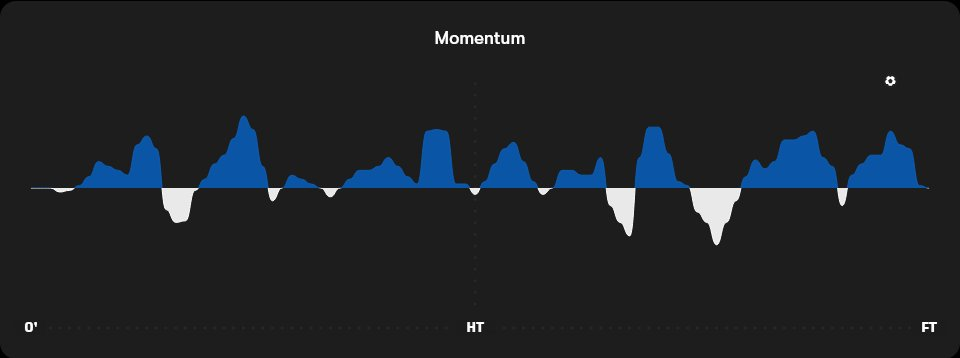

In [50]:
json_momentum = data['content']['momentum']['main']['data']
momentum_df = pd.json_normalize(json_momentum)
momentum_df

,minute,value
0,0.00,0
1,1.00,0
2,2.00,0
3,3.00,-5
4,4.00,-3
...,...,...
89,88.00,71
90,89.00,54
91,90.00,49
92,90.50,3


In [51]:
momentum = data['content']['matchFacts']['momentum']['main']['data']
momentum_data = pd.json_normalize(momentum)
momentum_data

,minute,value
0,1.0,0
1,2.0,0
2,3.0,-5
3,4.0,-3
4,5.0,3
...,...,...
87,87.0,41
88,88.0,71
89,89.0,54
90,90.0,49


**POTM**
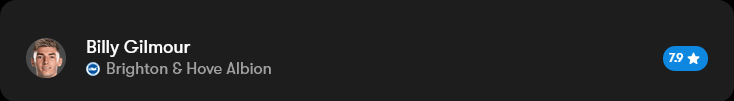

In [52]:
data['content']['matchFacts']['playerOfTheMatch']

{'id': 942549,
 'name': {'firstName': 'Billy',
  'lastName': 'Gilmour',
  'fullName': 'Billy Gilmour'},
 'teamName': 'Brighton & Hove Albion',
 'teamId': 10204,
 'rating': {'num': '7.9',
  'isTop': {'isTopRating': True, 'isMatchFinished': True}},
 'minutesPlayed': 89,
 'shotmap': [{'id': 2628792239,
   'eventType': 'AttemptSaved',
   'teamId': 10204,
   'playerId': 942549,
   'playerName': 'Billy Gilmour',
   'x': 83.8364077672,
   'y': 27.698571428000005,
   'min': 48,
   'minAdded': None,
   'isBlocked': False,
   'isOnTarget': True,
   'blockedX': 103.00862068980001,
   'blockedY': 32.6275,
   'goalCrossedY': 34.38125,
   'goalCrossedZ': 0.4879999976,
   'expectedGoals': 0.03835541382431984,
   'expectedGoalsOnTarget': 0.0229,
   'shotType': 'RightFoot',
   'situation': 'RegularPlay',
   'period': 'SecondHalf',
   'isOwnGoal': False,
   'onGoalShot': {'x': 0.8991402116402113,
    'y': 0.12910052846560846,
    'zoomRatio': 1},
   'isSavedOffLine': False,
   'teamColor': '#0850A0'}],


**Match Events/Timeline**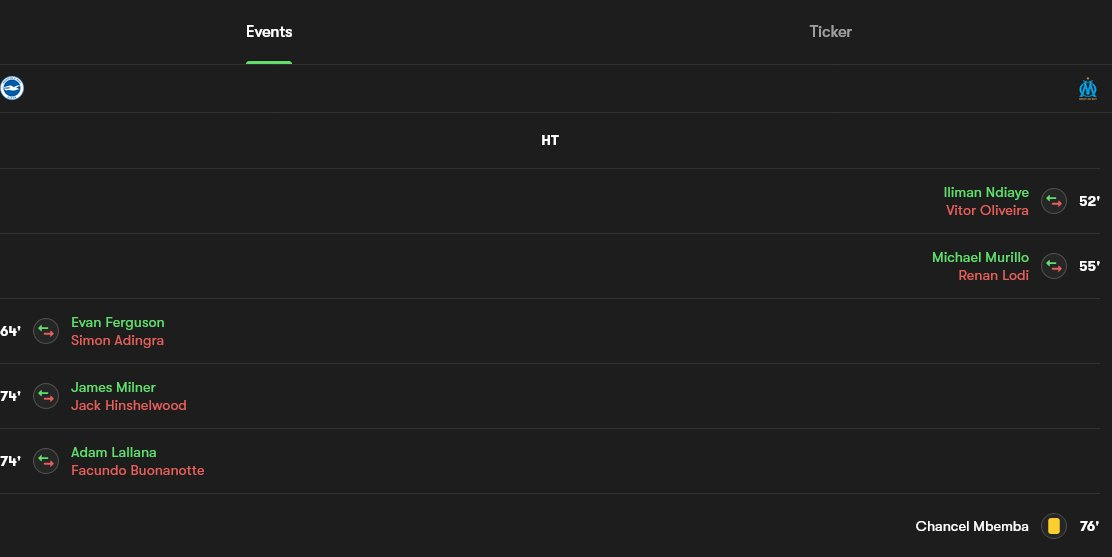

In [53]:
events_json = data['content']['matchFacts']['events']['events']
events = pd.json_normalize(events_json)
events

,reactKey,timeStr,type,time,overloadTime,halfStrShort,halfStrKey,player.id,player.profileUrl,profileUrl,...,shotmapEvent.period,shotmapEvent.isOwnGoal,shotmapEvent.onGoalShot.x,shotmapEvent.onGoalShot.y,shotmapEvent.onGoalShot.zoomRatio,shotmapEvent.isSavedOffLine,shotmapEvent.firstName,shotmapEvent.lastName,shotmapEvent.fullName,shotmapEvent.teamColor
0,45HalfNaNundefinedundefined,45,Half,45,NaN,HT,halftime_short,NaN,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52SubstitutionNaN965764false,52,Substitution,52,0.0,NaN,NaN,NaN,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55SubstitutionNaN643635false,55,Substitution,55,0.0,NaN,NaN,NaN,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64SubstitutionNaN1068482true,64,Substitution,64,0.0,NaN,NaN,NaN,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,74SubstitutionNaN38807true,74,Substitution,74,0.0,NaN,NaN,NaN,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,74SubstitutionNaN37234true,74,Substitution,74,0.0,NaN,NaN,NaN,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,76Card277761undefinedfalse,76,Card,76,NaN,NaN,NaN,277761.0,/players/277761/chancel-mbemba,/players/277761/chancel-mbemba,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,78SubstitutionNaN214972false,78,Substitution,78,0.0,NaN,NaN,NaN,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,78SubstitutionNaN771294false,78,Substitution,78,0.0,NaN,NaN,NaN,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,79Card37234undefinedtrue,79,Card,79,NaN,NaN,NaN,37234.0,/players/37234/adam-lallana,/players/37234/adam-lallana,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
